In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [16]:
df = pd.read_csv("../files/BRISTOR_Zegoland_demandShare.csv")

In [17]:
demande_share_A= df[["DemandShareA"]]
ex_factory_val= df[["Value"]]

In [18]:
ex_factory_val.head() 

,Value
0,56305.84
1,35581.00
2,41136.88
3,41689.80
4,54587.28


In [19]:
demande_share_A.head()  

,DemandShareA
0,0.013829
1,0.013842
2,0.013942
3,0.014830
4,0.016513


In [20]:
merged_values = pd.concat([ex_factory_val, demande_share_A], axis=1)

merged_values.head()

,Value,DemandShareA
0,56305.84,0.013829
1,35581.00,0.013842
2,41136.88,0.013942
3,41689.80,0.014830
4,54587.28,0.016513


#### Training and Test Data

In [21]:


# Assuming df is your DataFrame and 'Value' is the target variable
# Define features (X) and target (y)
X = df[['DemandShareA']]  # Replace with your predictor variables
y = df['Value']  # Replace with your target variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Display the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (25, 1)
X_test shape: (7, 1)
y_train shape: (25, 1)
y_test shape: (7, 1)


In [22]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Standardize the features
    ('regressor', LinearRegression()),
        # Step 2: Linear regression model
])


In [23]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [28]:
pred_values= pipeline.predict(X)   

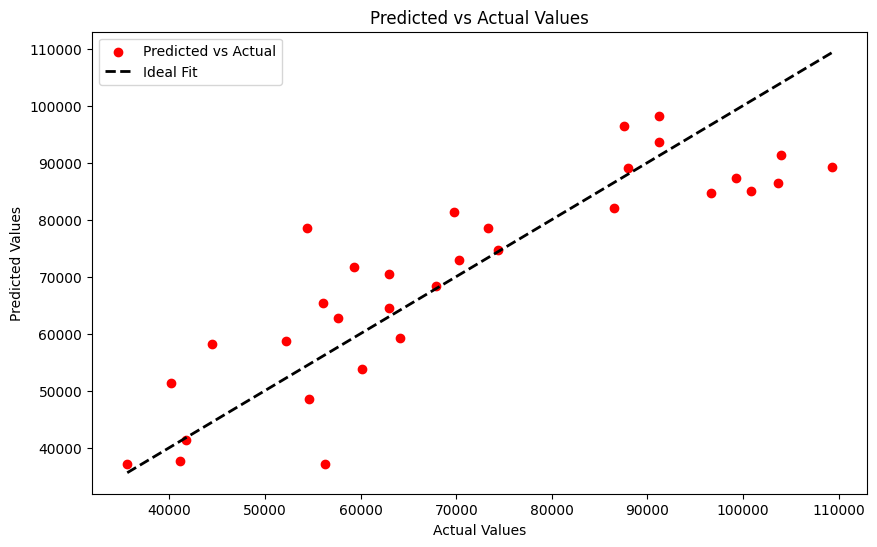

In [29]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y, pred_values, color='red', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()

In [33]:
from sklearn.preprocessing import PowerTransformer

pow=PowerTransformer()
y_trans= pow.fit_transform(y_train)

y_trans



array([[ 1.24734106],
       [-0.15928331],
       [-0.4989915 ],
       [-0.59181788],
       [ 0.37031129],
       [-1.47105222],
       [-0.15828735],
       [-0.42889209],
       [ 1.49390028],
       [-1.79832138],
       [-1.4045784 ],
       [ 1.68161762],
       [-1.36757771],
       [ 0.16530863],
       [ 0.92410121],
       [ 0.86849885],
       [-0.60465536],
       [ 1.04856598],
       [ 0.32302564],
       [-1.18957835],
       [-0.72803833],
       [ 0.18920589],
       [ 1.04829015],
       [ 1.34086171],
       [-0.29995444]])

/var/folders/0f/7pcrwybx3_zfsnzs2qjgxp8h0000gn/T/ipykernel_15075/2185964080.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_trans, shade=True)


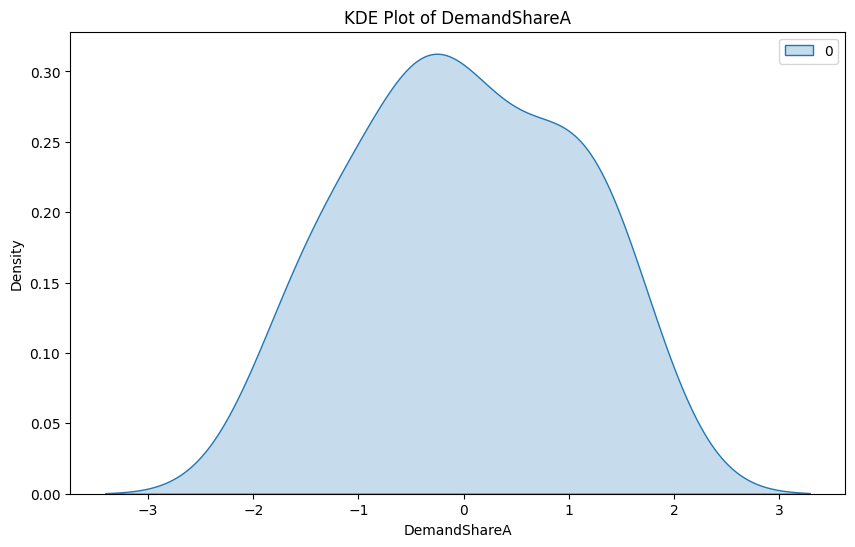

In [35]:
plt.figure(figsize=(10, 6))
sns.kdeplot(y, shade=True)
plt.title('KDE Plot of DemandShareA')
plt.xlabel('DemandShareA')
plt.ylabel('Density')
plt.show()